In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def retrieve_data(stocks, start, end):
    data = get_pricing(stocks, start_date = start, end_date = end, fields = 'price', frequency = 'minute').pct_change()[1:].dropna()
    data.columns = stocks
    data = data.resample('60T').mean().dropna()#resample to hourly
    mavg = data.rolling(window = 1).mean()
    return data, mavg

In [4]:
def calculate_weights(data):
    market_ret = data.mean(axis = 1)
    weights_temp = pd.DataFrame(columns = data.columns, index = data.index)
    for j in stocks:
        #weights_temp[j] = data[j]
        weights_temp[j] = market_ret - data[j]
    return weights_temp

In [5]:
def digitalise(weights_temp):
    weights = weights_temp*1
    for j in stocks:
        for i in range(len(weights)):
            if weights[j][i] > 0:
                weights[j][i] = 1 
            else:
                weights[j][i] = -1 #-1 for long-short o for long only
    return weights

#print(digitalise(weights_temp))


In [6]:
def calculate_market_return(data):
    market_ret = data.mean(axis = 1)
    return market_ret

#print(market_ret.head())

In [7]:
def calculate_strategy_returns(data, weights):
    returns = pd.DataFrame(index = data.index, columns = data.columns)
    for j in stocks:
        for i in range(1,len(data)):
            returns[j][i] = np.multiply(weights[j][i-1], data[j][i])            
    return returns

In [8]:
def calculate_portf_returns(returns):
    pmean_returns = returns.mean(axis = 1)
    #print(pmean_returns)
    pcum_returns = np.cumprod(pmean_returns+ 1) -1
    return pcum_returns

In [9]:
stocks = ['mosy', 'sgyp', 'opk', 'tops', 'args'
        ,'jagx', 'plug', 'cccl', 'drys', 'mark'
        ,'oncs', 'gern', 'win', 'gluu', 'nvax'
        , 'fcel', 'veon', 'odp', 'itus']#small cap? or same indutry? cant rememebr basis of selection
        

#print(len(stocks))
start = '2016-06-01'
end = '2017-06-01'

data, mavg = retrieve_data(stocks, start, end)
weights_temp = calculate_weights(mavg)
weights = digitalise(weights_temp)
market_ret = calculate_market_return(data)
returns = calculate_strategy_returns(data, weights)
pcum_returns = calculate_portf_returns(returns)

In [10]:
returns = returns - (returns.mean()*0.3)#transactions cost? cant remember...doesnt work-- wrong cost model
pcum_returns = calculate_portf_returns(returns)


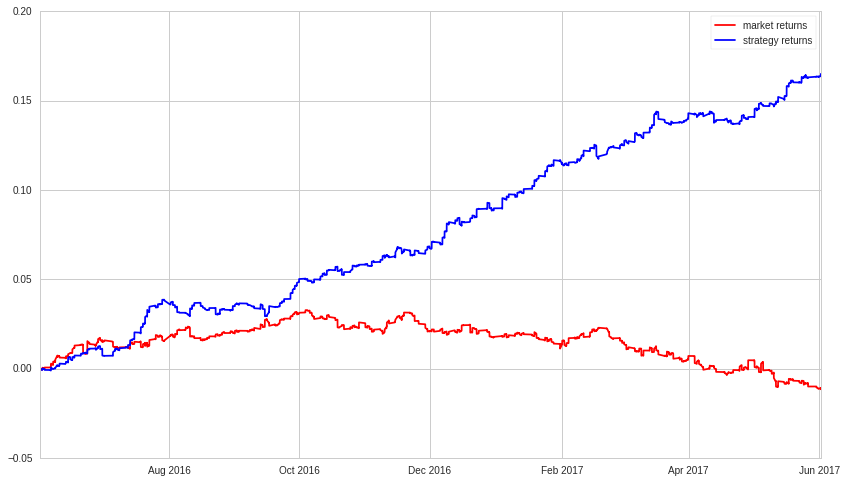

In [11]:
plt.plot(np.cumprod(market_ret+1)-1,'r')
plt.plot(pcum_returns,'b')
plt.legend(['market returns', 'strategy returns'])

In [12]:
def calculate_sharpe_ratio(returns):
    #pmean_returns = returns
    pmean_returns = returns.mean(axis = 1)
    sr = (pmean_returns.mean() / pmean_returns.std()) * np.sqrt(2016)# change with resampling period
    return sr

print(calculate_sharpe_ratio(returns))
    


5.20676631351


In [13]:
returns.mean(axis = 1).mean()*252*8

0.1528636958882436

In [14]:
returns.mean(axis = 1).std()*16*2.8

0.029293348562254698

In [15]:
len(returns[returns>1])/ len(returns)

1

In [16]:
len(returns[returns>1])

2021

In [17]:
returns

,mosy,sgyp,opk,tops,args,jagx,plug,cccl,drys,mark,oncs,gern,win,gluu,nvax,fcel,veon,odp,itus
2016-06-01 13:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-01 14:00:00+00:00,-0.000119303,0.000214412,-3.53893e-05,-3.78472e-05,0.000199356,6.37334e-05,-0.000141798,0.000611604,2.09212e-05,-0.000118597,-0.000122152,0.00014938,0.000289355,5.03247e-05,8.63145e-05,-0.000418568,0.000134813,0.000183553,3.17561e-05
2016-06-01 15:00:00+00:00,-0.000119303,6.34396e-05,-0.00014802,-8.06554e-05,0.00017743,-0.000280341,0.000218385,0.00042645,-0.000150563,-1.09924e-05,0.000534744,-0.000276676,-7.88826e-05,0.000122067,0.0002523,0.000287718,-0.000139365,9.06785e-05,-0.000274211
2016-06-01 16:00:00+00:00,-0.000119303,0.000157996,-6.92624e-05,-8.06554e-05,6.38442e-05,-4.55991e-05,-0.0001908,-7.86006e-05,-1.22548e-06,-0.000190253,-0.000317978,-0.000151969,-9.90517e-05,-4.82243e-05,-6.36325e-05,-0.000352747,-4.20295e-06,-3.23234e-06,-1.93686e-05
2016-06-01 17:00:00+00:00,-0.000110218,1.90588e-05,-2.73402e-06,0.000318511,-7.33598e-05,-4.55991e-05,0.000255242,0.000411595,3.99804e-06,2.69278e-05,-3.05706e-05,1.38507e-05,-0.000129069,-0.000117209,-9.4471e-06,-0.000378293,-4.88626e-05,2.04606e-05,-0.000320573
2016-06-01 18:00:00+00:00,-9.06638e-05,2.27707e-05,1.18445e-05,-8.06554e-05,-7.33862e-05,-0.000164647,8.1745e-05,0.00039759,0.000157207,-0.000229411,-2.44199e-05,-0.000148006,9.44486e-05,-4.91472e-05,4.59799e-05,-0.000210003,-4.42549e-05,0.000110282,-7.0337e-05
2016-06-01 19:00:00+00:00,3.79928e-05,-7.11057e-05,4.2968e-05,-8.06554e-05,-7.54606e-05,-4.55991e-05,-0.000102678,-6.98016e-05,-8.04185e-05,9.35344e-05,-7.80628e-05,-0.000177766,-0.000160654,-8.36947e-05,7.1205e-05,-0.000281246,0.000128282,4.00363e-05,0.000137966
2016-06-01 20:00:00+00:00,0.0102434,-0.00134417,-0.00095377,-0.0151687,0.00325948,-4.55991e-05,-1.07468e-05,-7.86006e-05,0.00917556,-1.10704e-05,-0.00276826,-0.00169257,-0.00371321,-0.00213839,-0.00326893,0.00115782,-3.32488e-06,-0.00288003,-1.93686e-05
2016-06-02 13:00:00+00:00,0.00112985,-0.000238837,1.43667e-05,-8.06554e-05,-0.000195923,-4.55991e-05,0.000416299,-0.000895755,-0.00120414,0.000278519,9.77241e-05,0.000466257,0.000230455,-0.000160729,9.34837e-05,-0.000470084,3.09604e-05,-6.10118e-06,4.77469e-05
2016-06-02 14:00:00+00:00,0.000596445,-0.000420747,-0.000123318,-0.000300479,-0.000435046,-0.00036934,-5.9995e-05,-0.000182652,0.000520449,6.36687e-05,-0.000220804,-0.000102458,0.000135598,5.80218e-05,-0.000225098,-0.0002134,-0.000203963,8.59754e-05,-1.93686e-05


In [18]:
print(weights)

                           mosy  sgyp  opk  tops  args  jagx  plug  cccl  \
2016-06-01 13:00:00+00:00  -1.0   1.0  1.0  -1.0  -1.0  -1.0   1.0  -1.0   
2016-06-01 14:00:00+00:00  -1.0  -1.0 -1.0  -1.0   1.0   1.0   1.0   1.0   
2016-06-01 15:00:00+00:00   1.0   1.0 -1.0   1.0  -1.0   1.0  -1.0  -1.0   
2016-06-01 16:00:00+00:00   1.0  -1.0 -1.0   1.0   1.0   1.0  -1.0   1.0   
2016-06-01 17:00:00+00:00   1.0   1.0  1.0  -1.0   1.0   1.0   1.0  -1.0   
2016-06-01 18:00:00+00:00  -1.0  -1.0 -1.0  -1.0  -1.0   1.0  -1.0   1.0   
2016-06-01 19:00:00+00:00   1.0  -1.0  1.0   1.0   1.0   1.0  -1.0   1.0   
2016-06-01 20:00:00+00:00  -1.0  -1.0  1.0   1.0  -1.0  -1.0  -1.0  -1.0   
2016-06-02 13:00:00+00:00   1.0  -1.0 -1.0  -1.0  -1.0  -1.0   1.0  -1.0   
2016-06-02 14:00:00+00:00  -1.0  -1.0  1.0  -1.0  -1.0  -1.0   1.0   1.0   
2016-06-02 15:00:00+00:00   1.0  -1.0  1.0   1.0  -1.0   1.0  -1.0   1.0   
2016-06-02 16:00:00+00:00   1.0   1.0 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0   
2016-06-02 1

In [19]:
print(weights_temp)

                                   mosy          sgyp       opk      tops  \
2016-06-01 13:00:00+00:00 -2.564077e-04  1.151269e-04  0.000173 -0.001433   
2016-06-01 14:00:00+00:00 -7.863455e-05 -2.949343e-04 -0.000047 -0.000036   
2016-06-01 15:00:00+00:00  1.336744e-04  1.990016e-04 -0.000010  0.000134   
2016-06-01 16:00:00+00:00  3.637317e-05 -1.235106e-04 -0.000029  0.000036   
2016-06-01 17:00:00+00:00  9.176975e-06  3.920872e-05  0.000020 -0.000381   
2016-06-01 18:00:00+00:00 -3.659194e-05 -3.261100e-05 -0.000024 -0.000008   
2016-06-01 19:00:00+00:00  1.758539e-04 -5.066008e-05  0.000066  0.000019   
2016-06-01 20:00:00+00:00 -1.084382e-02 -1.823410e-03  0.000469  0.014607   
2016-06-02 13:00:00+00:00  1.124872e-03 -3.612316e-04 -0.000143 -0.000124   
2016-06-02 14:00:00+00:00 -5.524309e-04 -2.555426e-04  0.000044 -0.000057   
2016-06-02 15:00:00+00:00  9.322604e-05 -3.321486e-05  0.000049  0.000120   
2016-06-02 16:00:00+00:00  7.761545e-04  2.575071e-04 -0.000027 -0.000066   